# Collect Data

1. 153 Fonts in raw data file
1. Classify each one based on appearance
1. Investigate each of following unique classes
    1. OLD_STYLE     (11)
    1. MODERN        (11)
    1. SANS_SERIF    (36)
    1. ELECTRONIC    (1)
    1. GOTHIC        (1)
    1. DECORATIVE    (15)
    1. HAND_WRITING  (9)
    1. TRANSITIONAL  (9)
    1. FOREIGN       (5)
    1. SCRIPT        (23)
    1. STENCIL       (2)
    1. MONOSPACE     (5)
    1. UNKNOWN       (25)

## Imports and Globals

In [1]:
from collections import namedtuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import plot_utils.plot_font as PU
import plot_utils.plot_clusters as PLOT_CLUST
import sci_kit_learn_utils.clustering as CLUST

## Define Named Tuple With Font Information

1. Create single list FONTS for each font
    1. Name of the font - matches file name on /data partition
    1. Font variant name - derived from raw files
    1. Classification - manually derived
    1. Two letter label for use in dataframes during classifcation
        1. HAND_WRITING : hw
        1. DECORATIVE   : de
        1. FOREIGN      : fo
        1. SCRIPT       : sc
        1. TRANSITIONAL : tr
        1. MONOSPACE    : ms
        1. STENCIL      : st
        1. GOTHIC       : go
        1. ELECTRONIC   : el
        1. OLD_STYLE    : os
        1. SANS_SERIF   : ss
        1. UNKNOWN      : uk
        1. MODERN       : mo

In [2]:
FontSelection = namedtuple('FontSelection', ['name', 'variant', 'style', 'c_label'])

FONTS = [
    FontSelection('baiti','MONGOLIAN BAITI','foreign','fo'),
    FontSelection('mingliu','MINGLIU_HKSCS-EXTB','foreign','fo'),
    FontSelection('mingliu','MINGLIU-EXTB','foreign','fo'),
    FontSelection('myanmar','MYANMAR TEXT','foreign','fo'),
    FontSelection('phagspa','MICROSOFT PHAGSPA','foreign','fo'),
    FontSelection('pmingliu-extb','PMINGLIU-EXTB','foreign','fo'),
    FontSelection('baskerville','BASKERVILLE OLD FACE','transitional','tr'),
    FontSelection('bell','BELL MT','transitional','tr'),
    FontSelection('bookman','BOOKMAN OLD STYLE','transitional','tr'),
    FontSelection('cambria','CAMBRIA','transitional','tr'),
    FontSelection('constantia','CONSTANTIA','transitional','tr'),
    FontSelection('euroroman','EUROROMAN','transitional','tr'),
    FontSelection('georgia','GEORGIA','transitional','tr'),
    FontSelection('perpetua','PERPETUA TITLING MT','transitional','tr'),
    FontSelection('perpetua','PERPETUA','transitional','tr'),
    FontSelection('times','TIMES NEW ROMAN','transitional','tr'),
    FontSelection('times','scanned','transitional','tr'),
    FontSelection('book','BOOK ANTIQUA','unknown','uk'),
    FontSelection('caard','CAARD-LN','unknown','uk'),
    FontSelection('caard','CAARD','unknown','uk'),
    FontSelection('complex','COMPLEX','unknown','uk'),
    FontSelection('creditcard','scanned','unknown','uk'),
    FontSelection('english','OLD ENGLISH TEXT MT','unknown','uk'),
    FontSelection('informal','INFORMAL ROMAN','unknown','uk'),
    FontSelection('isoc','ISOCPEUR','unknown','uk'),
    FontSelection('isoc','ISOCTEUR','unknown','uk'),
    FontSelection('isoc','ISOCP2','unknown','uk'),
    FontSelection('isoc','ISOCT3','unknown','uk'),
    FontSelection('isoc','ISOCT','unknown','uk'),
    FontSelection('isoc','ISOCT2','unknown','uk'),
    FontSelection('isoc','ISOCP3','unknown','uk'),
    FontSelection('italic','ITALIC','unknown','uk'),
    FontSelection('italic','ITALICC','unknown','uk'),
    FontSelection('italic','ITALICT','unknown','uk'),
    FontSelection('javanese','JAVANESE TEXT','unknown','uk'),
    FontSelection('modern','MODERN NO. 20','unknown','uk'),
    FontSelection('nina','NINA','unknown','uk'),
    FontSelection('numerics','scanned','unknown','uk'),
    FontSelection('panroman','PANROMAN','unknown','uk'),
    FontSelection('reference','MS REFERENCE SANS SERIF','unknown','uk'),
    FontSelection('richard','POOR RICHARD','unknown','uk'),
    FontSelection('romantic','ROMANTIC','unknown','uk'),
    FontSelection('serif','MICROSOFT SANS SERIF','unknown','uk'),
    FontSelection('simplex','SIMPLEX','unknown','uk'),
    FontSelection('sitka','SITKA SMALL','unknown','uk'),
    FontSelection('sitka','SITKA SUBHEADING','unknown','uk'),
    FontSelection('sitka','SITKA DISPLAY','unknown','uk'),
    FontSelection('sitka','SITKA HEADING','unknown','uk'),
    FontSelection('sitka','SITKA TEXT','unknown','uk'),
    FontSelection('sitka','SITKA BANNER','unknown','uk'),
    FontSelection('sylfaen','SYLFAEN','unknown','uk'),
    FontSelection('tai','MICROSOFT NEW TAI LUE','unknown','uk'),
    FontSelection('tai','MICROSOFT TAI LE','unknown','uk'),
    FontSelection('tempus','TEMPUS SANS ITC','unknown','uk'),
    FontSelection('vin','scanned','unknown','uk'),
    FontSelection('wide','WIDE LATIN','unknown','uk'),
    FontSelection('yi_baiti','MICROSOFT YI BAITI','unknown','uk'),
    FontSelection('e13b','scanned','electronic','el'),
    FontSelection('e13b','CAERE MICR','electronic','el'),
    FontSelection('californian','CALIFORNIAN FB','old_style','os'),
    FontSelection('calisto','CALISTO MT','old_style','os'),
    FontSelection('centaur','CENTAUR','old_style','os'),
    FontSelection('cooper','COOPER BLACK','old_style','os'),
    FontSelection('felix_titling','FELIX TITLING','old_style','os'),
    FontSelection('garamond','GARAMOND','old_style','os'),
    FontSelection('goudy','GOUDY STOUT','old_style','os'),
    FontSelection('goudy','GOUDY OLD STYLE','old_style','os'),
    FontSelection('high_tower','HIGH TOWER TEXT','old_style','os'),
    FontSelection('palatino','PALATINO LINOTYPE','old_style','os'),
    FontSelection('roman','ROMAND','old_style','os'),
    FontSelection('roman','ROMANT','old_style','os'),
    FontSelection('roman','ROMANS','old_style','os'),
    FontSelection('roman','ROMANC','old_style','os'),
    FontSelection('superfrench','SUPERFRENCH','old_style','os'),
    FontSelection('agency','AGENCY FB','sans_serif','ss'),
    FontSelection('arial','ARIAL','sans_serif','ss'),
    FontSelection('arial','scanned','sans_serif','ss'),
    FontSelection('arial','ARIAL BLACK','sans_serif','ss'),
    FontSelection('arial','ARIAL NARROW','sans_serif','ss'),
    FontSelection('arial','ARIAL ROUNDED MT BOLD','sans_serif','ss'),
    FontSelection('bankgothic','BANKGOTHIC LT BT','sans_serif','ss'),
    FontSelection('bankgothic','BANKGOTHIC MD BT','sans_serif','ss'),
    FontSelection('bauhaus','BAUHAUS 93','sans_serif','ss'),
    FontSelection('berlin','BERLIN SANS FB','sans_serif','ss'),
    FontSelection('berlin','BERLIN SANS FB DEMI','sans_serif','ss'),
    FontSelection('bitstreamvera','scanned','sans_serif','ss'),
    FontSelection('britannic','BRITANNIC BOLD','sans_serif','ss'),
    FontSelection('broadway','BROADWAY','sans_serif','ss'),
    FontSelection('calibri','CALIBRI','sans_serif','ss'),
    FontSelection('calibri','CALIBRI LIGHT','sans_serif','ss'),
    FontSelection('candara','CANDARA','sans_serif','ss'),
    FontSelection('consolas','CONSOLAS','sans_serif','ss'),
    FontSelection('copperplate','COPPERPLATE GOTHIC LIGHT','sans_serif','ss'),
    FontSelection('copperplate','COPPERPLATE GOTHIC BOLD','sans_serif','ss'),
    FontSelection('corbel','CORBEL','sans_serif','ss'),
    FontSelection('ebrima','EBRIMA','sans_serif','ss'),
    FontSelection('eras','ERAS DEMI ITC','sans_serif','ss'),
    FontSelection('eras','ERAS MEDIUM ITC','sans_serif','ss'),
    FontSelection('eras','ERAS LIGHT ITC','sans_serif','ss'),
    FontSelection('eras','ERAS BOLD ITC','sans_serif','ss'),
    FontSelection('franklin','FRANKLIN GOTHIC DEMI','sans_serif','ss'),
    FontSelection('franklin','FRANKLIN GOTHIC BOOK','sans_serif','ss'),
    FontSelection('franklin','FRANKLIN GOTHIC DEMI COND','sans_serif','ss'),
    FontSelection('franklin','FRANKLIN GOTHIC MEDIUM COND','sans_serif','ss'),
    FontSelection('franklin','FRANKLIN GOTHIC HEAVY','sans_serif','ss'),
    FontSelection('franklin','FRANKLIN GOTHIC MEDIUM','sans_serif','ss'),
    FontSelection('gadugi','GADUGI','sans_serif','ss'),
    FontSelection('gill','GILL SANS ULTRA BOLD','sans_serif','ss'),
    FontSelection('gill','GILL SANS MT EXT CONDENSED BOLD','sans_serif','ss'),
    FontSelection('gill','GILL SANS MT CONDENSED','sans_serif','ss'),
    FontSelection('gill','GILL SANS MT','sans_serif','ss'),
    FontSelection('gill','GILL SANS ULTRA BOLD CONDENSED','sans_serif','ss'),
    FontSelection('haettenschweiler','HAETTENSCHWEILER','sans_serif','ss'),
    FontSelection('impact','IMPACT','sans_serif','ss'),
    FontSelection('leelawadee','LEELAWADEE UI','sans_serif','ss'),
    FontSelection('leelawadee','LEELAWADEE UI SEMILIGHT','sans_serif','ss'),
    FontSelection('lucida','LUCIDA SANS UNICODE','sans_serif','ss'),
    FontSelection('lucida','LUCIDA CONSOLE','sans_serif','ss'),
    FontSelection('lucida','LUCIDA SANS TYPEWRITER','sans_serif','ss'),
    FontSelection('lucida','LUCIDA SANS','sans_serif','ss'),
    FontSelection('lucida','LUCIDA CALLIGRAPHY','sans_serif','ss'),
    FontSelection('lucida','LUCIDA BRIGHT','sans_serif','ss'),
    FontSelection('lucida','LUCIDA FAX','sans_serif','ss'),
    FontSelection('lucida','LUCIDA HANDWRITING','sans_serif','ss'),
    FontSelection('maiandra','MAIANDRA GD','sans_serif','ss'),
    FontSelection('monospac821','MONOSPAC821 BT','sans_serif','ss'),
    FontSelection('monotype','MONOTYPE CORSIVA','sans_serif','ss'),
    FontSelection('nirmala','NIRMALA UI','sans_serif','ss'),
    FontSelection('nirmala','NIRMALA UI SEMILIGHT','sans_serif','ss'),
    FontSelection('ocra','scanned','sans_serif','ss'),
    FontSelection('ocra','OCR A EXTENDED','sans_serif','ss'),
    FontSelection('ocra','OCR-A II','sans_serif','ss'),
    FontSelection('ocra','CAERE OCR A','sans_serif','ss'),
    FontSelection('ocra','OCR-A-REGULAR','sans_serif','ss'),
    FontSelection('quicktype','QUICKTYPE II MONO','sans_serif','ss'),
    FontSelection('quicktype','QUICKTYPE II CONDENSED','sans_serif','ss'),
    FontSelection('quicktype','QUICKTYPE II','sans_serif','ss'),
    FontSelection('sansserif','SANSSERIF','sans_serif','ss'),
    FontSelection('segoe','SEGOE UI LIGHT','sans_serif','ss'),
    FontSelection('segoe','SEGOE UI SEMILIGHT','sans_serif','ss'),
    FontSelection('segoe','SEGOE UI','sans_serif','ss'),
    FontSelection('segoe','SEGOE UI SEMIBOLD','sans_serif','ss'),
    FontSelection('segoe','SEGOE UI BLACK','sans_serif','ss'),
    FontSelection('segoe','SEGOE MDL2 ASSETS','sans_serif','ss'),
    FontSelection('segoe','SEGOE UI HISTORIC','sans_serif','ss'),
    FontSelection('segoe','SEGOE PRINT','sans_serif','ss'),
    FontSelection('segoe','SEGOE UI EMOJI','sans_serif','ss'),
    FontSelection('segoe','SEGOE SCRIPT','sans_serif','ss'),
    FontSelection('segoe','SEGOE CONDENSED','sans_serif','ss'),
    FontSelection('segoe','SEGOE MARKER','sans_serif','ss'),
    FontSelection('swis721','SWIS721 LT BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 EX BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 BLKCN BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 BDOUL BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 BLKEX BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 LTCN BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 CN BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 LTEX BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 BLKOUL BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 BLK BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 BDCNOUL BT','sans_serif','ss'),
    FontSelection('swis721','SWIS721 BT','sans_serif','ss'),
    FontSelection('tahoma','TAHOMA','sans_serif','ss'),
    FontSelection('technic','TECHNICBOLD','sans_serif','ss'),
    FontSelection('technic','TECHNICLITE','sans_serif','ss'),
    FontSelection('technic','TECHNIC','sans_serif','ss'),
    FontSelection('trebuchet','TREBUCHET MS','sans_serif','ss'),
    FontSelection('tw','TW CEN MT CONDENSED','sans_serif','ss'),
    FontSelection('tw','TW CEN MT','sans_serif','ss'),
    FontSelection('tw','TW CEN MT CONDENSED EXTRA BOLD','sans_serif','ss'),
    FontSelection('verdana','VERDANA','sans_serif','ss'),
    FontSelection('gunplay','GUNPLAY','stencil','st'),
    FontSelection('stencil','STENCIL','stencil','st'),
    FontSelection('buxton','BUXTON SKETCH','hand_writing','hw'),
    FontSelection('cityblueprint','CITYBLUEPRINT','hand_writing','hw'),
    FontSelection('countryblueprint','COUNTRYBLUEPRINT','hand_writing','hw'),
    FontSelection('handprint','scanned','hand_writing','hw'),
    FontSelection('magneto','MAGNETO','hand_writing','hw'),
    FontSelection('mistral','MISTRAL','hand_writing','hw'),
    FontSelection('papyrus','PAPYRUS','hand_writing','hw'),
    FontSelection('sketchflow','SKETCHFLOW PRINT','hand_writing','hw'),
    FontSelection('viner','VINER HAND ITC','hand_writing','hw'),
    FontSelection('bernard','BERNARD MT CONDENSED','modern','mo'),
    FontSelection('bodoni','BODONI MT POSTER COMPRESSED','modern','mo'),
    FontSelection('bodoni','BODONI MT','modern','mo'),
    FontSelection('bodoni','BODONI MT CONDENSED','modern','mo'),
    FontSelection('bodoni','BODONI MT BLACK','modern','mo'),
    FontSelection('century','CENTURY','modern','mo'),
    FontSelection('century','CENTURY SCHOOLBOOK','modern','mo'),
    FontSelection('century','CENTURY GOTHIC','modern','mo'),
    FontSelection('dutch801','DUTCH801 XBD BT','modern','mo'),
    FontSelection('dutch801','DUTCH801 RM BT','modern','mo'),
    FontSelection('elephant','ELEPHANT','modern','mo'),
    FontSelection('engravers','ENGRAVERS MT','modern','mo'),
    FontSelection('footlight','FOOTLIGHT MT LIGHT','modern','mo'),
    FontSelection('gloucester','GLOUCESTER MT EXTRA CONDENSED','modern','mo'),
    FontSelection('niagara','NIAGARA SOLID','modern','mo'),
    FontSelection('niagara','NIAGARA ENGRAVED','modern','mo'),
    FontSelection('onyx','ONYX','modern','mo'),
    FontSelection('playbill','PLAYBILL','modern','mo'),
    FontSelection('blackadder','BLACKADDER ITC','script','sc'),
    FontSelection('bradley','BRADLEY HAND ITC','script','sc'),
    FontSelection('brush','BRUSH SCRIPT MT','script','sc'),
    FontSelection('commercialscript','COMMERCIALSCRIPT BT','script','sc'),
    FontSelection('edwardian','EDWARDIAN SCRIPT ITC','script','sc'),
    FontSelection('forte','FORTE','script','sc'),
    FontSelection('freestyle','FREESTYLE SCRIPT','script','sc'),
    FontSelection('french','FRENCH SCRIPT MT','script','sc'),
    FontSelection('gabriola','GABRIOLA','script','sc'),
    FontSelection('gigi','GIGI','script','sc'),
    FontSelection('harlow','HARLOW SOLID ITALIC','script','sc'),
    FontSelection('himalaya','MICROSOFT HIMALAYA','script','sc'),
    FontSelection('kristen','KRISTEN ITC','script','sc'),
    FontSelection('kunstler','KUNSTLER SCRIPT','script','sc'),
    FontSelection('matura','MATURA MT SCRIPT CAPITALS','script','sc'),
    FontSelection('mv_boli','MV BOLI','script','sc'),
    FontSelection('palace','PALACE SCRIPT MT','script','sc'),
    FontSelection('pristina','PRISTINA','script','sc'),
    FontSelection('scriptb','SCRIPT MT BOLD','script','sc'),
    FontSelection('script','SCRIPTC','script','sc'),
    FontSelection('script','SCRIPTS','script','sc'),
    FontSelection('stylus','STYLUS BT','script','sc'),
    FontSelection('vivaldi','VIVALDI','script','sc'),
    FontSelection('vladimir','VLADIMIR SCRIPT','script','sc'),
    FontSelection('castellar','CASTELLAR','decorative','de'),
    FontSelection('chiller','CHILLER','decorative','de'),
    FontSelection('comic','COMIC SANS MS','decorative','de'),
    FontSelection('curlz','CURLZ MT','decorative','de'),
    FontSelection('harrington','HARRINGTON','decorative','de'),
    FontSelection('imprint','IMPRINT MT SHADOW','decorative','de'),
    FontSelection('jokerman','JOKERMAN','decorative','de'),
    FontSelection('juice','JUICE ITC','decorative','de'),
    FontSelection('money','scanned','decorative','de'),
    FontSelection('proxy','PROXY 2','decorative','de'),
    FontSelection('proxy','PROXY 3','decorative','de'),
    FontSelection('proxy','PROXY 4','decorative','de'),
    FontSelection('proxy','PROXY 9','decorative','de'),
    FontSelection('proxy','PROXY 1','decorative','de'),
    FontSelection('proxy','PROXY 6','decorative','de'),
    FontSelection('proxy','PROXY 5','decorative','de'),
    FontSelection('proxy','PROXY 7','decorative','de'),
    FontSelection('proxy','PROXY 8','decorative','de'),
    FontSelection('rage','RAGE ITALIC','decorative','de'),
    FontSelection('ravie','RAVIE','decorative','de'),
    FontSelection('showcard','SHOWCARD GOTHIC','decorative','de'),
    FontSelection('snap','SNAP ITC','decorative','de'),
    FontSelection('vineta','VINETA BT','decorative','de'),
    FontSelection('gothice','GOTHICE','gothic','go'),
    FontSelection('courier','COURIER NEW','monospace','ms'),
    FontSelection('courier','scanned','monospace','ms'),
    FontSelection('monotxt','MONOTXT','monospace','ms'),
    FontSelection('ocrb','scanned','monospace','ms'),
    FontSelection('ocrb','OCR-B 10 BT','monospace','ms'),
    FontSelection('ocrb','CAERE OCR B','monospace','ms'),
    FontSelection('ocrb','OCR B MT','monospace','ms'),
    FontSelection('ocrb','OCR-B-REGULAR','monospace','ms'),
    FontSelection('rockwell','ROCKWELL','monospace','ms'),
    FontSelection('rockwell','ROCKWELL CONDENSED','monospace','ms'),
    FontSelection('rockwell','ROCKWELL EXTRA BOLD','monospace','ms'),
    FontSelection('txt','TXT','monospace','ms')
]

## Create Lists For Each Classification

In [3]:
UNIQUE_STYLES = set([x.style for x in FONTS])
FONTS_BY_STYLE_DICT = {s:[x for x in FONTS if x.style == s] for s in UNIQUE_STYLES}

## Load Font

In [7]:
font_list = FONTS_BY_STYLE_DICT['sans_serif']
for font in font_list:
    print(f'{font.name}')
    tf = LF.LoadFont(font.name).get_trimmed_font()
    print(tf.keys())
#     for k,v in tf.items():
#         c=v['min_char_count']
#         print(f'  {k:25s} : {c}')

agency
dict_keys([])
arial
dict_keys(['scanned', 'ARIAL', 'ARIAL BLACK'])
arial
dict_keys(['scanned', 'ARIAL', 'ARIAL BLACK'])
arial
dict_keys(['scanned', 'ARIAL', 'ARIAL BLACK'])
arial
dict_keys(['scanned', 'ARIAL', 'ARIAL BLACK'])
arial
dict_keys(['scanned', 'ARIAL', 'ARIAL BLACK'])
bankgothic
dict_keys([])
bankgothic
dict_keys([])
bauhaus
dict_keys([])
berlin
dict_keys([])
berlin
dict_keys([])
bitstreamvera
dict_keys([])
britannic
dict_keys([])
broadway
dict_keys([])
calibri
dict_keys(['CALIBRI'])
calibri
dict_keys(['CALIBRI'])
candara
dict_keys([])
consolas
dict_keys(['CONSOLAS'])
copperplate
dict_keys([])
copperplate
dict_keys([])
corbel
dict_keys([])
ebrima
dict_keys([])
eras
dict_keys([])
eras
dict_keys([])
eras
dict_keys([])
eras
dict_keys([])
franklin
dict_keys([])
franklin
dict_keys([])
franklin
dict_keys([])
franklin
dict_keys([])
franklin
dict_keys([])
franklin
dict_keys([])
gadugi
dict_keys([])
gill
dict_keys([])
gill
dict_keys([])
gill
dict_keys([])
gill
dict_keys([])
gil

In [5]:
raw_dir='/data/udel-ms-data-science/math-637/project-1/char-fonts/raw/'
df = pd.read_csv(raw_dir+'felix_titling.csv')
print(f'({df.iloc[0].font})')
# c=df.loc[(df.font=='FELIX TITLING') & (df.fontVariant=='FELIX TITLING') & (df.m_label==98) & (df.italic==0)]
# c

(FELIX TITLING)


## Show Example Characters

NameError: name 'FONT_DICT' is not defined

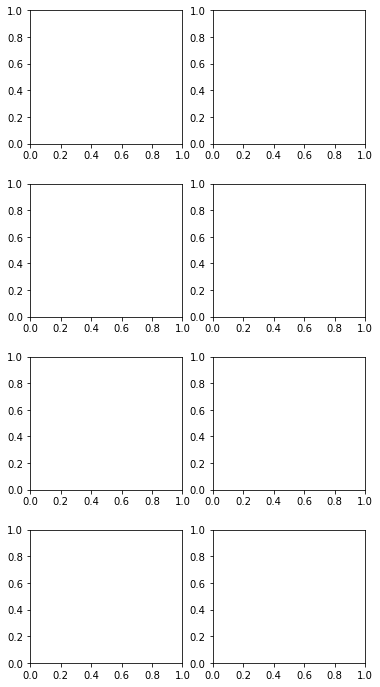

In [6]:
example_ltr = ord('e')
caption_str = ['Normal', 'Bold']

ex_rows=4
ex_cols=2
ex_fig_size = [6,12]

# create figure (fig), and array of axes (ax)
ex_fig, ex_ax = plt.subplots(nrows=ex_rows, ncols=ex_cols, figsize=ex_fig_size)
plt.subplots_adjust(hspace=0.3)

img_list = list()

for font, d in FONT_DICT.items():
    font_df = d['df']

    norm_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[0]
    bold_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[1]

    letters = [norm_ltr, bold_ltr]
    for ltr in letters:
        img = np.array(ltr[1:], dtype=np.uint8).reshape(20,20)
        img_list.append((f'{font}',img))
        
for i, axi in enumerate(ex_ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    axi.imshow(img_list[i][1])
    # get indices of row/column
    # write row/col indices as axes' title for identification
    axi.set_title(f'{img_list[i][0]} {caption_str[i%2]} : {example_ltr}')

plt.show()

#ex_fig.savefig("example_chars.pdf", bbox_inches='tight')